## Charts using Citi, Google, Amazon, Microsoft, and Apple data

Hat tip to <a href='https://www.udemy.com/python-for-finance-and-trading-algorithms'>Jose Portilla</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pandas_datareader
import pandas_datareader.data as datar
import datetime

%matplotlib inline

In [2]:
# https://www.nasdaq.com/symbol/?Load=true
# C = Citi
# Google = GOOGL Class A Common Stock
# Google = GOOG Class C Capital Stock
# Microsoft = MSFT
# Apple = AAPL
# Amazon = AMZN

start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2019, 3, 1)

citi = datar.DataReader('C', 'iex', start, end)
citi.index = pd.to_datetime(citi.index)
print('CITI')
print(citi.head())
print(citi.shape)
print()

googl = datar.DataReader('GOOGL', 'iex', start, end)
googl.index = pd.to_datetime(googl.index)
print('GOOGL')
print(googl.head())
print(googl.shape)
# print(googl.index)
# print(googl.info())
print()

goog = datar.DataReader('GOOG', 'iex', start, end)
goog.index = pd.to_datetime(goog.index)
print('GOOG')
print(goog.head())
print(goog.shape)
print()

msft = datar.DataReader('MSFT', 'iex', start, end)
msft.index = pd.to_datetime(msft.index)
print('MSFT')
print(msft.head())
print(msft.shape)
print()

aapl = datar.DataReader('AAPL', 'iex', start, end)
aapl.index = pd.to_datetime(aapl.index)
print('AAPL')
print(aapl.head())
print(aapl.shape)
print()

amzn = datar.DataReader('AMZN', 'iex', start, end)
amzn.index = pd.to_datetime(amzn.index)
print('AMZN')
print(amzn.head())
print(amzn.shape)

CITI
               open     high      low    close    volume
date                                                    
2014-03-18  45.1455  45.5142  44.9092  45.5142  19517186
2014-03-19  45.5899  46.8191  45.4008  46.2706  30308826
2014-03-20  46.6015  47.7077  46.3368  47.4808  33885644
2014-03-21  48.2182  48.2182  47.1404  47.3484  38406929
2014-03-24  47.4619  47.8873  47.0648  47.3201  21170311
(1248, 5)

GOOGL
                open      high       low     close   volume
date                                                       
2014-03-18  597.9323  606.3708  597.1265  606.2356  3639572
2014-03-19  606.5059  606.6010  597.8022  600.2246  3222579
2014-03-20  600.5750  605.4098  598.2777  599.1786  3366583
2014-03-21  603.7582  605.4198  591.8162  592.1115  6414897
2014-03-24  592.6871  593.0425  573.5480  579.5440  6072230
(1248, 5)

GOOG
               open    high     low   close  volume
date                                               
2014-03-27  568.000  568.00  552.92  55

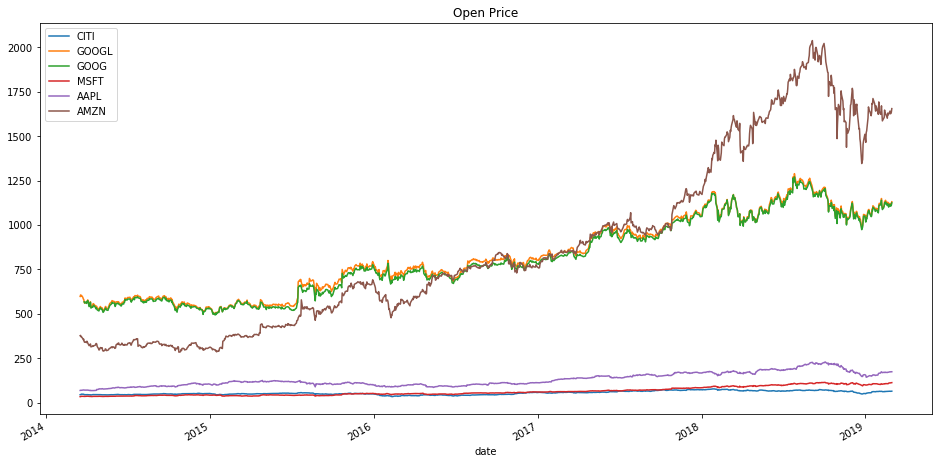

In [3]:
# Plot values as is

citi['open'].plot(label='CITI',figsize=(16,8),title='Open Price')
googl['open'].plot(label='GOOGL')
goog['open'].plot(label='GOOG')
msft['open'].plot(label='MSFT')
aapl['open'].plot(label='AAPL')
amzn['open'].plot(label='AMZN')

plt.legend()

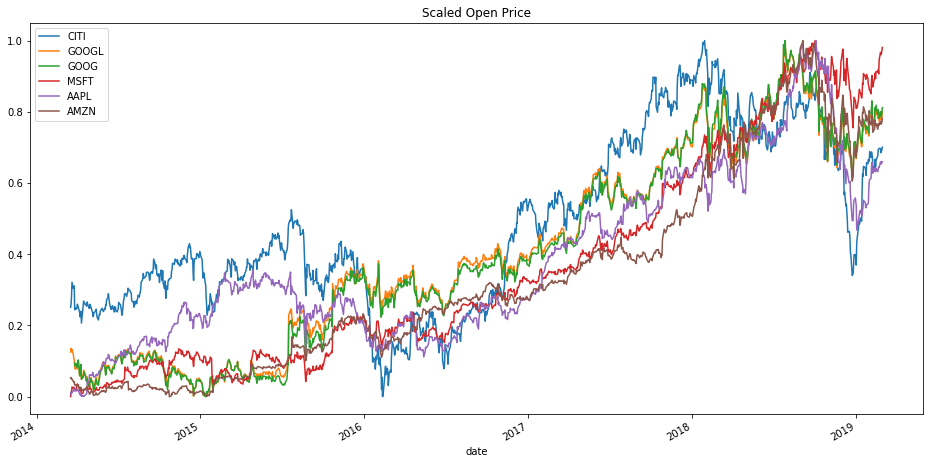

In [4]:
# Plot values scaled
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

symbols = [(citi, 'CITI'), (googl, 'GOOGL'), (goog, 'GOOG'), (msft, 'MSFT'), (aapl, 'AAPL'), (amzn, 'AMZN')]

fig = plt.figure(figsize=(16,8))
plt.title('Scaled Open Price')

for symbol, title in symbols:
    df = pd.DataFrame(scaler.fit_transform(symbol), columns=symbol.columns, index=symbol.index)
    df['open'].plot(label=title)

plt.legend()

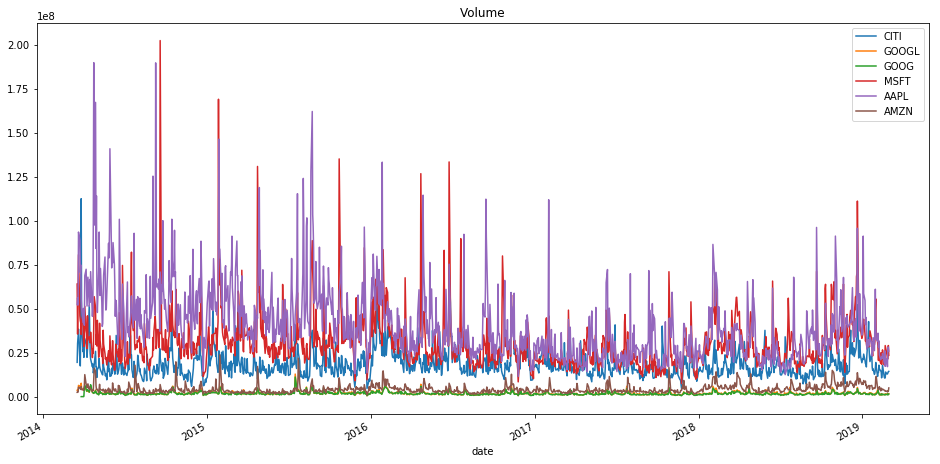

In [5]:
citi['volume'].plot(label='CITI',figsize=(16,8),title='Volume')
googl['volume'].plot(label='GOOGL')
goog['volume'].plot(label='GOOG')
msft['volume'].plot(label='MSFT')
aapl['volume'].plot(label='AAPL')
amzn['volume'].plot(label='AMZN')
plt.legend()

<Figure size 1152x576 with 0 Axes>

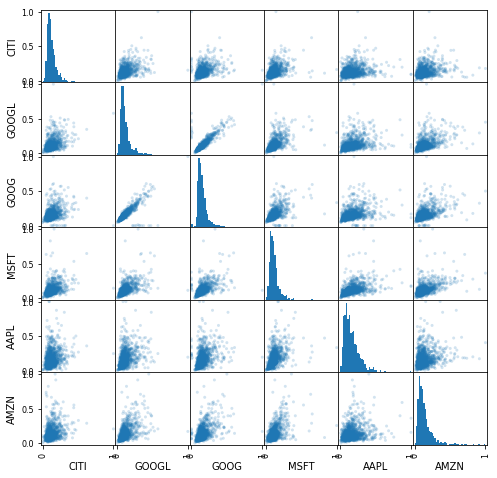

In [6]:
from pandas.plotting import scatter_matrix

compare_volumes = pd.DataFrame()

symbols = [(citi, 'CITI'), (googl, 'GOOGL'), (goog, 'GOOG'), (msft, 'MSFT'), (aapl, 'AAPL'), (amzn, 'AMZN')]
fig = plt.figure(figsize=(16,8))

for symbol, title in symbols:
    compare_volumes[title] = symbol['volume']

compare_volumes = pd.DataFrame(scaler.fit_transform(compare_volumes.fillna(0)))
compare_volumes.columns = ['CITI','GOOGL','GOOG','MSFT','AAPL','AMZN']
scatter_matrix(compare_volumes,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

In [7]:
# pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

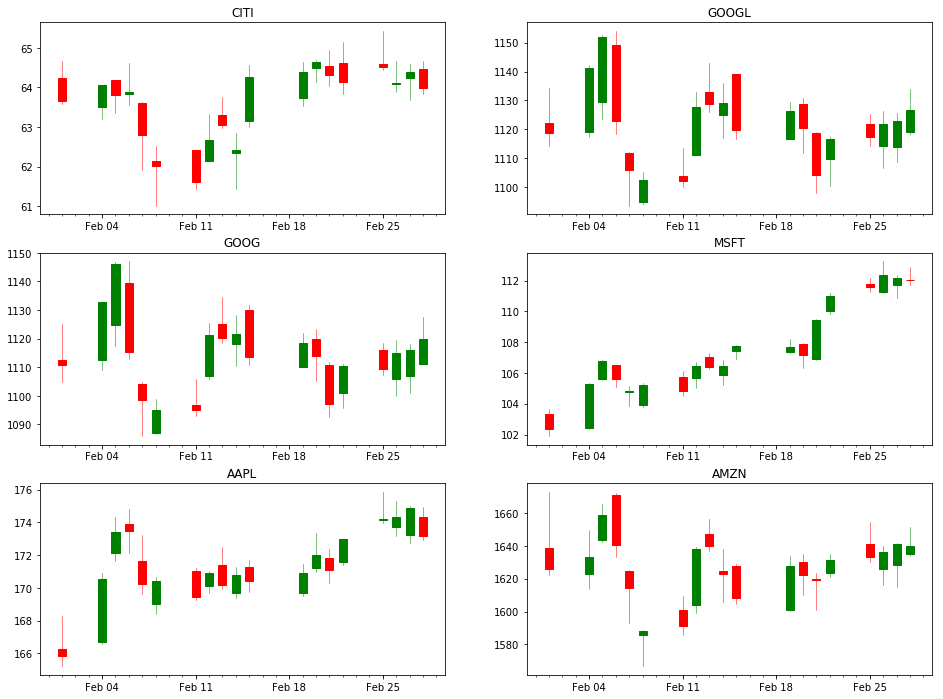

In [8]:
# deprecated from matplotlib.mpl_finance import candlestick_ohlc
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

fig = plt.figure(figsize=(16,12))

ax1 = plt.subplot2grid((3, 2), (0, 0))
ax2 = plt.subplot2grid((3, 2), (0, 1))
ax3 = plt.subplot2grid((3, 2), (1, 0))
ax4 = plt.subplot2grid((3, 2), (1, 1))
ax5 = plt.subplot2grid((3, 2), (2, 0))
ax6 = plt.subplot2grid((3, 2), (2, 1))

plots = [(ax1, citi, 'CITI'), (ax2, googl, 'GOOGL'),(ax3, goog, 'GOOG'),(ax4, msft, 'MSFT'),(ax5, aapl, 'AAPL'),(ax6, amzn, 'AMZN')]

for ax, symbol, title in plots:
    # Get days in month
    df_reset = symbol.loc['2019-2':'2019-2'].reset_index()
    
    # Create a new column of numerical "date" values for matplotlib to use
    df_reset['date_ax'] = df_reset['date'].apply(lambda date: date2num(date))
    df_values = [tuple(vals) for vals in df_reset[['date_ax', 'open', 'high', 'low', 'close']].values]

    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()                  # minor ticks on the days
    weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
    dayFormatter = DateFormatter('%d')      # e.g., 12

    #Plot it
    ax.xaxis.set_major_locator(mondays)
    ax.xaxis.set_minor_locator(alldays)
    ax.xaxis.set_major_formatter(weekFormatter)
    
    ax.set_title(title)

    candlestick_ohlc(ax, df_values, width=0.6, colorup='g',colordown='r');

## Daily Percentage Change

In [9]:
citi['returns'] = citi['close'].pct_change(1)
googl['returns'] = googl['close'].pct_change(1)
goog['returns'] = goog['close'].pct_change(1)
msft['returns'] = msft['close'].pct_change(1)
aapl['returns'] = aapl['close'].pct_change(1)
amzn['returns'] = amzn['close'].pct_change(1)

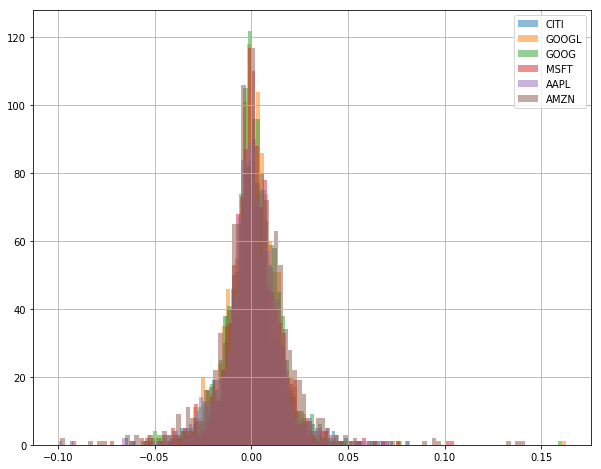

In [10]:
citi['returns'].hist(bins=100,label='CITI',figsize=(10,8),alpha=0.5)
googl['returns'].hist(bins=100,label='GOOGL',alpha=0.5)
goog['returns'].hist(bins=100,label='GOOG',alpha=0.5)
msft['returns'].hist(bins=100,label='MSFT',alpha=0.5)
aapl['returns'].hist(bins=100,label='AAPL',alpha=0.5)
amzn['returns'].hist(bins=100,label='AMZN',alpha=0.5)
plt.legend()

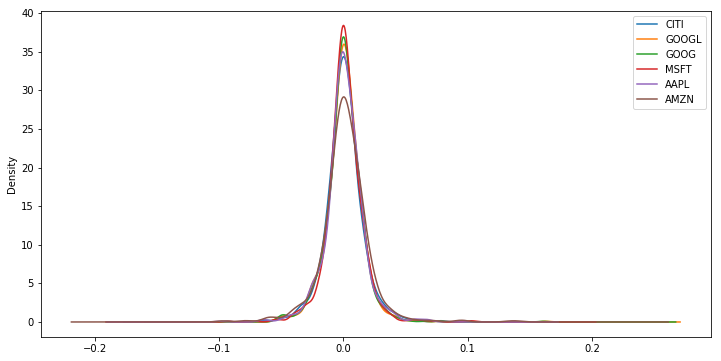

In [11]:
citi['returns'].plot(kind='kde',label='CITI',figsize=(12,6))
googl['returns'].plot(kind='kde',label='GOOGL')
goog['returns'].plot(kind='kde',label='GOOG')
msft['returns'].plot(kind='kde',label='MSFT')
aapl['returns'].plot(kind='kde',label='AAPL')
amzn['returns'].plot(kind='kde',label='AMZN')
plt.legend()

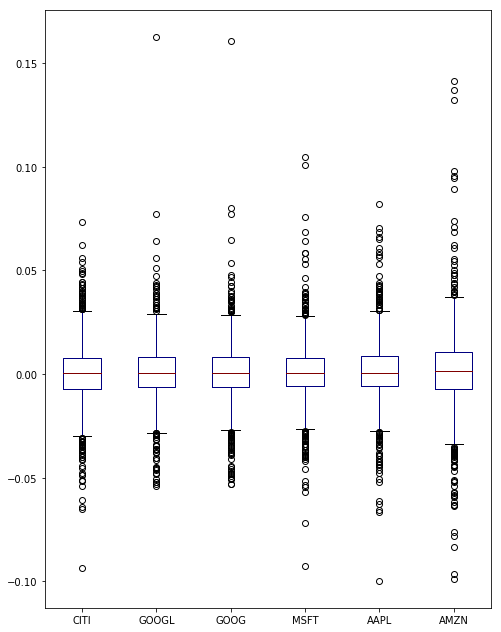

In [12]:
box_df = pd.concat([citi['returns'],googl['returns'],goog['returns'],msft['returns'],aapl['returns'],amzn['returns']],axis=1)
box_df.columns = ['CITI','GOOGL','GOOG','MSFT','AAPL','AMZN']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

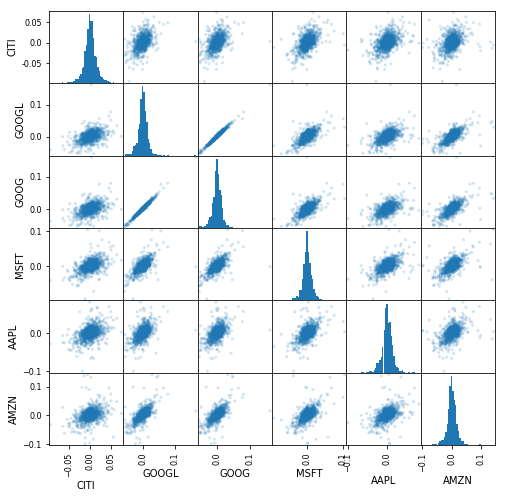

In [13]:
# Comparing daily returns
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

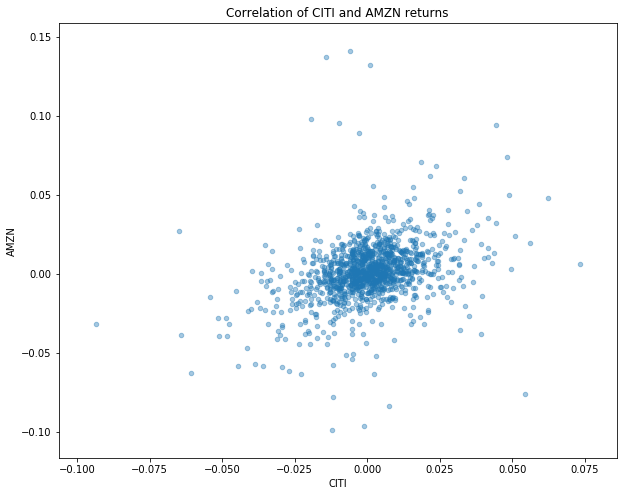

In [14]:
# Examine relationships 
box_df.plot(kind='scatter',x='CITI',y='AMZN',alpha=0.4,figsize=(10,8), title='Correlation of CITI and AMZN returns')

## Cumulative Product

In [15]:
citi['Cumulative Return'] = (1 + citi['returns']).cumprod()
googl['Cumulative Return'] = (1 + googl['returns']).cumprod()
goog['Cumulative Return'] = (1 + goog['returns']).cumprod()
msft['Cumulative Return'] = (1 + msft['returns']).cumprod()
aapl['Cumulative Return'] = (1 + aapl['returns']).cumprod()
amzn['Cumulative Return'] = (1 + amzn['returns']).cumprod()

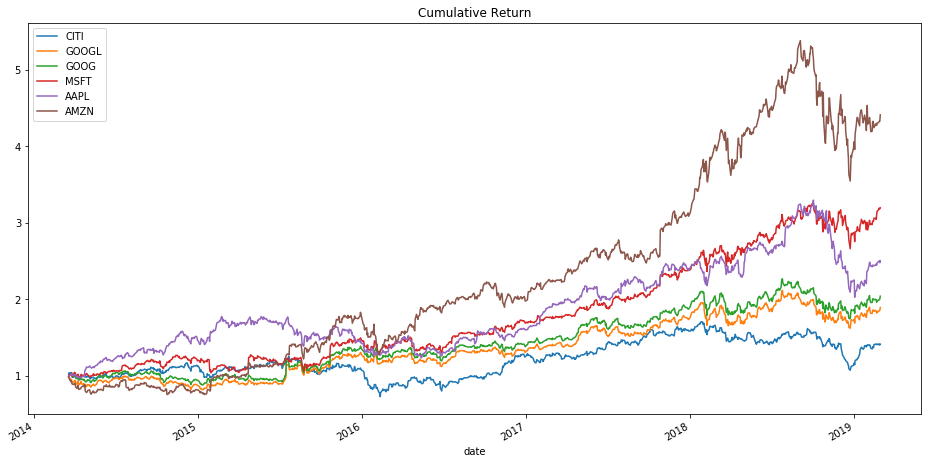

In [16]:
citi['Cumulative Return'].plot(label='CITI',figsize=(16,8),title='Cumulative Return')
googl['Cumulative Return'].plot(label='GOOGL')
goog['Cumulative Return'].plot(label='GOOG')
msft['Cumulative Return'].plot(label='MSFT')
aapl['Cumulative Return'].plot(label='AAPL')
amzn['Cumulative Return'].plot(label='AMZN')
plt.legend()